In [1]:
import pandas as pd
import numpy as np
import histlite as hl
import tables
import matplotlib.pyplot as plt
import os

import histlite as hl
from csky import plotting

In [2]:
plotting.mrichman_mpl()

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/csky/plotting.py:92: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  r'\SetSymbolFont{operators}   {sans}{OT1}{cmss} {m}{n}'


In [3]:
sim_nc = {}
sim_cc = {}

file_dir = '/data/user/ssclafani/PointSource/DNNCascade/i3_processing/version-1.0/DNNCascadeL4__i3_to_hdf5/Lepton-injector/'
dataset_id = [ '22430', '22431', '22432', '22437', '22448','22456', '22457', '22458', '22459']
baseline_dataset_id  = ['22492', '22493', '22494', '22495', '22496',
             '22497', '22498', '22499', '22500']
baseline = True
if baseline:
    dataset_id = baseline_dataset_id
    print ('Making array for baseline')
else:
    print('Making array for snowstorm')
for dataset in dataset_id:
    sim_cc[dataset] = tables.open_file(file_dir + dataset + f'/DNNCascadeL4__i3_to_hdf5_Lepton-injector_CC_{dataset}_00000000.hdf5')
    sim_nc[dataset] = tables.open_file(file_dir + dataset + f'/DNNCascadeL4__i3_to_hdf5_Lepton-injector_NC_{dataset}_00000000.hdf5')

    

Making array for baseline


In [4]:
m = sim_cc['22492']

In [4]:
weights_cc = {}
weights_nc = {}
for dataset in dataset_id:
    weights_cc[dataset] = pd.read_hdf(f'/data/user/ssclafani/GP_Diffuse/weights/level4/weight_df_0{dataset}_cascade_CC.hdf')
    weights_nc[dataset] = pd.read_hdf(f'/data/user/ssclafani/GP_Diffuse/weights/level4/weight_df_0{dataset}_cascade_NC.hdf')

In [5]:
weights = {}
sim = {}
for dataset in dataset_id:
    weights[dataset] = pd.concat([weights_cc[dataset], weights_nc[dataset]])
    #sim[dataset] = pd.concat([pd.DataFrame(sim_cc[dataset]), pd.DataFrame(sim_nc[dataset])])

In [6]:
for dataset in dataset_id:
    print(dataset)
    print(weights_cc[dataset].shape)
    print(len(sim_cc[dataset].root.event_selection_cascade.cols.azimuth[:]))

22492
(334540, 47)
334540
22493
(62188, 47)
62188
22494
(3956, 47)
3956
22495
(591635, 47)
591635
22496
(97052, 47)
97052
22497
(5152, 47)
5152
22498
(188722, 47)
188722
22499
(36400, 47)
36400
22500
(3600, 47)
3600


In [7]:
'''w_bfr = sum(1.36e-18 * bfr_array_numu['oneweight'] * (bfr_array_numu['trueE']/1e5)**-2.37)
print(w_bfr)
a = li['22430']
w_le = sum(1.36e-18 * a['oneweight'] * (a['trueE']/1e5)**-2.37)
a = li['22431']
w_me = sum(1.36e-18 * a['oneweight'] * (a['trueE']/1e5)**-2.37)  
a = li['22432']
w_he = sum(1.36e-18 * a['oneweight'] * (a['trueE']/1e5)**-2.37) 
print(w_le + w_me)

a = li['22430']
w_le_a = sum(a['w_astro'])/ 86400 / 365 /2
a = li['22431']
w_me_a = sum(a['w_astro']) / 86400 / 365 /2
a = li['22432']
w_he_a = sum(a['w_astro']) / 86400 / 365 /2
print(w_le_a + w_me_a+w_he_a)

print(w_bfr/(w_le + w_me+w_he))
print(w_bfr/(w_le_a + w_me_a+w_he_a))'''


"w_bfr = sum(1.36e-18 * bfr_array_numu['oneweight'] * (bfr_array_numu['trueE']/1e5)**-2.37)\nprint(w_bfr)\na = li['22430']\nw_le = sum(1.36e-18 * a['oneweight'] * (a['trueE']/1e5)**-2.37)\na = li['22431']\nw_me = sum(1.36e-18 * a['oneweight'] * (a['trueE']/1e5)**-2.37)  \na = li['22432']\nw_he = sum(1.36e-18 * a['oneweight'] * (a['trueE']/1e5)**-2.37) \nprint(w_le + w_me)\n\na = li['22430']\nw_le_a = sum(a['w_astro'])/ 86400 / 365 /2\na = li['22431']\nw_me_a = sum(a['w_astro']) / 86400 / 365 /2\na = li['22432']\nw_he_a = sum(a['w_astro']) / 86400 / 365 /2\nprint(w_le_a + w_me_a+w_he_a)\n\nprint(w_bfr/(w_le + w_me+w_he))\nprint(w_bfr/(w_le_a + w_me_a+w_he_a))"

In [8]:
def rename_snowstorm_params(df):
    parameter_names=[
        'Scattering', 'Absorption', 'AnisotropyScale', 
        'DOMEfficiency', 'HoleIceForward_Unified_00', 
        'HoleIceForward_Unified_01',
    ]
    for i, param in enumerate(parameter_names):
        df[param] = df['SnowstormParameters_{:05d}'.format(i)]



In [9]:
def make_array(dataset, weights, dataset_id, li=True, ss = True, cut_level5=False):

    if ss:
        dtype = [('azi', '<f8'), ('zen', '<f8'), ('energy', '<f8'), ('dec', '<f8'), 
                        ('ra', '<f8'), ('trueE', '<f8'), ('trueAzi', '<f8'), ('trueZen', '<f8'),
                        ('pf', '<f8'), ('oneweight', '<f8'), ('w_atmo', '<f8'), ('w_astro', '<f8'),
                        ('dataset', '<f8'), ('Scattering', '<f8'), ('Absorption', '<f8'), 
                        ('AnisotropyScale', '<f8'), ('DOMEfficiency', '<f8'), ('HoleIceForward_Unified_00', '<f8'),
                        ('HoleIceForward_Unified_01', '<f8')]
    else:
        dtype = [('azi', '<f8'), ('zen', '<f8'), ('energy', '<f8'), ('dec', '<f8'), 
                        ('ra', '<f8'), ('trueE', '<f8'), ('trueAzi', '<f8'), ('trueZen', '<f8'),
                        ('pf', '<f8'), ('oneweight', '<f8'), ('w_atmo', '<f8'), ('w_astro', '<f8'),
                        ('dataset', '<f8')]
    if cut_level5:
        energy_cut = (dataset.root.EventGeneratorSelectedRecoNN_I3Particle.cols.energy[:] > 500)
        # MuonBDT cut
        bdt1 = (dataset.root.BDT_bdt_max_depth_4_n_est_2000lr_0_02_seed_3_train_size_50.cols.pred_001[:] < 5e-3)
        # CascadeBDT cut
        bdt2 = (dataset.root['BDT_bdt_max_depth_4_n_est_1000lr_0.01_seed_3_train_size_50'].cols.pred_001[:] > 0.1)
   
        # vertex cuts (these help to discard mis-reconstructions)
        # cut on radius in x-y-plane is defined in `vertex_radius_cut`
        #(('EventGeneratorSelectedRecoNN_I3Particle', 'z'), '>', -700),
        #(('EventGeneratorSelectedRecoNN_I3Particle', 'z'), '<', 600),

        # Angular Error cut on uncorrected sigma
        #(('EventGeneratorSelectedRecoNNCircularUncertainty', ''),<', np.deg2rad(40)),
        #bdt1 = (dataset.root.BDT_bdt_max_depth_4_n_est_2000lr_0_02_seed_3_train_size_50.cols.pred_001[:] < 5e-03) 
        #bdt2 = (dataset.root['BDT_bdt_max_depth_4_n_est_1000lr_0.01_seed_3_train_size_50'].cols.pred_000[:] < .1) 
        #energy_cut = (dataset.root.EventGeneratorSelectedRecoNN_I3Particle.cols.energy[:] > 500)
        mask = bdt1 & bdt2 & energy_cut
    else:
        mask = dataset.root.EventGeneratorSelectedRecoNN_I3Particle.cols.energy[:] > 1 # all events in level 4
    n = len(dataset.root.EventGeneratorSelectedRecoNN_I3Particle.cols.azimuth[:][mask])
    a = np.empty(n, dtype)
    a['azi'] = azi = dataset.root.EventGeneratorSelectedRecoNN_I3Particle.cols.azimuth[:][mask]
    a['zen'] = zen = dataset.root.EventGeneratorSelectedRecoNN_I3Particle.cols.zenith[:][mask]
    a['energy'] = dataset.root.EventGeneratorSelectedRecoNN_I3Particle.cols.energy[:][mask]
    a['energy'] = np.clip(a['energy'], 1, 1e9)
    a['dec'] = zen - np.pi/2
    a['ra'] = azi
    if li:
        print('Using LILW')
        a['trueE'] = weights.nu_energy.values[mask]
        a['trueAzi'] = weights.nu_azimuth.values[mask]
        a['trueZen'] = weights.nu_zenith.values[mask]
        a['pf'] = weights.veto_pf.values[mask]
        a['oneweight'] = weights.oneweight.values[mask]
        a['w_atmo'] = weights['weight1.0_atmo'].values[mask] 
        #a['w_astro'] = 1.36e-18 * a['oneweight'] * (a['trueE']/1e5)**-2.37 * 86400 * 365 #weights['weight1.0_astro'].values
        a['w_astro'] = weights['weight1.0_astro'].values[mask] /2 #Maybe average over NC + CC?
        a['dataset'] = np.ones_like(a['trueE']) * int(dataset_id)
        if ss:
            a['Scattering'] = weights['ice_scattering'].values[mask]
            a['Absorption'] = weights['ice_absorption'].values[mask]
            a['AnisotropyScale'] = weights['ice_anisotropy_scale'].values[mask]
            a['DOMEfficiency'] = weights['dom_efficiency'].values[mask]
            a['HoleIceForward_Unified_00'] = weights['hole_ice_forward_p0'].values[mask]
            a['HoleIceForward_Unified_01'] = weights['hole_ice_forward_p1'].values[mask]
       
    else:
        print('Using NuGen Weights')
        n_files = dataset.root.weights_meta_info.cols.n_files[0]
        n_events_per_file = dataset.root.weights_meta_info.cols.n_events_per_run[0]
        a['trueE'] = dataset.root.MCPrimary.cols.energy[:][mask]
        a['trueAzi'] = dataset.root.MCPrimary.cols.azimuth[:][mask]
        a['trueZen'] = dataset.root.MCPrimary.cols.zenith[:][mask]
        a['pf'] = dataset.root.nuveto.cols.pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total[:][mask]
        a['oneweight'] = dataset.root.I3MCWeightDict.cols.OneWeight[:][mask] / (2*n_files) / n_events_per_file
        a['w_atmo'] = dataset.root.weights.cols.MCEq_H3a_sibyll2_3c_total[:][mask] / 2
        #a['w_astro'] = 1.66e-18 * a['oneweight'] * (a['trueE']/1e5)**-2.53
        a['w_astro'] = 1.36e-18 * a['oneweight'] * (a['trueE']/1e5)**-2.37
        a['dataset'] = np.ones_like(a['trueE']) * int(dataset_id)
    return a

In [10]:
li = {}
for dataset in dataset_id:
    li_cc = make_array(sim_cc[dataset], weights_cc[dataset], dataset, cut_level5=True, ss=False)
    li_nc = make_array(sim_nc[dataset], weights_nc[dataset], dataset, cut_level5=True, ss=False)

    li[dataset] = np.hstack([li_cc, li_nc])
    


Using LILW
Using LILW
Using LILW
Using LILW
Using LILW
Using LILW
Using LILW
Using LILW
Using LILW
Using LILW
Using LILW
Using LILW
Using LILW
Using LILW
Using LILW
Using LILW
Using LILW
Using LILW


In [11]:
for key in li.keys():
    print(key, len(li[key]['trueE']))

22492 163346
22493 84018
22494 8250
22495 569138
22496 135943
22497 7080
22498 308745
22499 108922
22500 10743


In [12]:

for i, dataset in enumerate(li.keys()):
    if i == 0:
        li_allflavor = li[dataset]
    else:
        li_allflavor = np.concatenate([li_allflavor, li[dataset]])

In [13]:
save=True
if save:
    if baseline:
        if not os.path.exists('/data/user/ssclafani/PointSource/DNNCascade/final_level/'):
            os.mkdir('/data/user/ssclafani/PointSource/DNNCascade/final_level/')
        np.save('/data/user/ssclafani/PointSource/DNNCascade/final_level/lilw_allflavor_baseline.npy', li_allflavor)
    else:
        if not os.path.exists('/data/user/ssclafani/PointSource/DNNCascade/final_level/'):
            os.mkdir('/data/user/ssclafani/PointSource/DNNCascade/final_level/')
        np.save('/data/user/ssclafani/PointSource/DNNCascade/final_level/lilw_allflavor_snowstorm.npy', li_allflavor)

In [15]:
bfr_numu1 = tables.open_file('/data/ana/PointSource/DNNCascade/i3_processing/version-1.0/DNNCascadeL4__i3_to_hdf5/NuGen/21535/DNNCascadeL4__i3_to_hdf5_NuGen_21535_00000000.hdf5')
bfr_numu2 = tables.open_file('/data/ana/PointSource/DNNCascade/i3_processing/version-1.0/DNNCascadeL4__i3_to_hdf5/NuGen/21535/DNNCascadeL4__i3_to_hdf5_NuGen_21535_00001000.hdf5')

In [16]:
bfr_nutau1 = tables.open_file('/data/ana/PointSource/DNNCascade/i3_processing/version-1.0/DNNCascadeL4__i3_to_hdf5/NuGen/21536/DNNCascadeL4__i3_to_hdf5_NuGen_21536_00000000.hdf5')
bfr_nutau2 = tables.open_file('/data/ana/PointSource/DNNCascade/i3_processing/version-1.0/DNNCascadeL4__i3_to_hdf5/NuGen/21536/DNNCascadeL4__i3_to_hdf5_NuGen_21536_00001000.hdf5')

In [17]:
bfr_nue1 = tables.open_file('/data/ana/PointSource/DNNCascade/i3_processing/version-1.0/DNNCascadeL4__i3_to_hdf5/NuGen/21537/DNNCascadeL4__i3_to_hdf5_NuGen_21537_00000000.hdf5')
bfr_nue2 = tables.open_file('/data/ana/PointSource/DNNCascade/i3_processing/version-1.0/DNNCascadeL4__i3_to_hdf5/NuGen/21537/DNNCascadeL4__i3_to_hdf5_NuGen_21537_00001000.hdf5')

In [18]:
print(sum(bfr_nue1.root.weights.cols.MCEq_H3a_sibyll2_3c_total[:]))
print(sum(bfr_nue2.root.weights.cols.MCEq_H3a_sibyll2_3c_total[:]))

0.00012433468491479137
0.00012588123509548512


In [19]:
bfr_array_numu1 = make_array(bfr_numu1, weights, '21535', li=False, cut_level5=True)
bfr_array_numu2 = make_array(bfr_numu2, weights, '21535', li=False, cut_level5=True)

bfr_array_nue1 = make_array(bfr_nue1, weights, '21537', li=False, cut_level5=True)
bfr_array_nue2 = make_array(bfr_nue2, weights, '21537', li=False, cut_level5=True)

bfr_array_nutau1 = make_array(bfr_nutau1, weights, '21536', li=False, cut_level5=True)
bfr_array_nutau2 = make_array(bfr_nutau2, weights, '21536', li=False, cut_level5=True)

Using NuGen Weights
Using NuGen Weights
Using NuGen Weights
Using NuGen Weights
Using NuGen Weights
Using NuGen Weights


In [20]:
bfr_array_numu = np.concatenate([bfr_array_numu1, bfr_array_numu2])
bfr_array_nue = np.concatenate([bfr_array_nue1, bfr_array_nue2])
bfr_array_nutau = np.concatenate([bfr_array_nutau1, bfr_array_nutau2])

In [21]:
bfr_allflavor = np.concatenate([bfr_array_numu1, bfr_array_nue1, bfr_array_nutau1, bfr_array_numu2, bfr_array_nue2, bfr_array_nutau2])

In [22]:
livetime = 86400 * 365

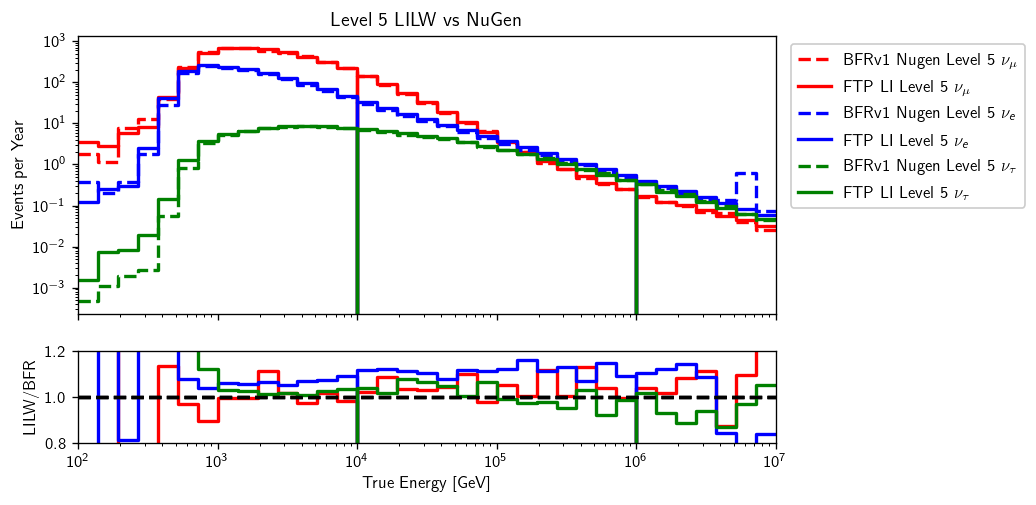

In [24]:
bins = 35
range = (100,1e7)
flavors = ['numu', 'nue', 'nutau']
colors  = ['red', 'blue', 'green']
lss = ['-', '--']
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(7.5,4.5), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')


for i, flavor in enumerate(flavors):
    
    if flavor == 'numu':
        if baseline:
            datasets = [ '22492', '22493', '22494']
        else:
            datasets = ['22430', '22431', '22432',]
        bfr_array = bfr_array_numu
        flavor_name = r'$\nu_\mu$'
    elif flavor == 'nue':
        if baseline:
            datasets = [ '22495', '22496', '22497']
        else:
            datasets = ['22437', '22448', '22456']
        bfr_array = bfr_array_nue
        flavor_name = r'$\nu_e$'
    elif flavor == 'nutau':
        if baseline:
            datasets = ['22498', '22499', '22500']
        else:
            datasets = ['22457', '22458', '22459']
            bfr_array = bfr_array_nutau
        flavor_name = r'$\nu_\tau$'
    h_bfr = hl.hist((np.nan_to_num(bfr_array['trueE'])), 
                    weights=(((bfr_array['w_astro'] + bfr_array['w_atmo'])* livetime)),
                     bins=bins, range=range, log=True);
    hl.plot1d(ax1, h_bfr, lw=2, color = colors[i], ls='--', label='BFRv1 Nugen Level 5 {}'.format(flavor_name))        
    for j, dataset in enumerate(datasets):    
            li_array = li[dataset]
            h_li = hl.hist((np.nan_to_num(li_array['trueE'])), 
                           weights=(li_array['w_astro'] + li_array['w_atmo'] ) , 
                           bins=bins, range=range, log=True);
            if j == 0:
                hl.plot1d(ax1, h_li, lw=2, color = colors[i], ls='-', label='FTP LI Level 5 {}'.format(flavor_name))
                hl.plot1d(ax2, h_li/h_bfr, lw=2, color = colors[i])
            else: 
                hl.plot1d(ax1, h_li, lw=2, color = colors[i], ls='-', )
                hl.plot1d(ax2, h_li/h_bfr, lw=2, color = colors[i])



    ax1.loglog()
    ax2.semilogx()

    plt.xlabel('True Energy [GeV]')
    ax1.set_title('Level 5 LILW vs NuGen')
    ax1.set_ylabel('Events per Year')
    ax1.legend(bbox_to_anchor=(1.01,1))
    ax1.set_xlim(range)
    #plt.xlim(1e2,1e7)
    ax2.set_ylim(.8,1.2)
    ax2.set_ylabel('LILW/BFR')
    ax2.axhline(1, c='k', ls='--')

In [ ]:
bins = 35
range=(0,360)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(7.5,4.5), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')

h_li = hl.hist(np.degrees(li_allflavor['azi']), weights=li_allflavor['w_atmo'], 
               bins=bins, range=range);
h_bfr = hl.hist(np.degrees(bfr_allflavor['azi']), weights=(bfr_allflavor['w_atmo'] ) * livetime,
         bins=bins, range=range);

hl.plot1d(ax1, h_li, lw=2, label='FTP Lepton Injector')
hl.plot1d(ax1, h_bfr, lw=2, label='BFRv1 Nugen')
hl.plot1d(ax2, h_li/h_bfr)
plt.xlabel('Azimuth')
ax1.set_title('Simulation Comparison Lepton-Injector vs BFR')
ax1.set_ylabel('Events per Year')
ax1.legend()
plt.xlim(0,360)
ax1.set_ylim(0)
ax2.set_ylim(.1,1.5)
ax2.axhline(1, c='k', ls='--')

In [ ]:
bins = 35
range=(-1,1)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(7.5,4.5), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')

h_li = hl.hist(np.cos(li_allflavor['zen']), weights=li_allflavor['w_atmo'] * li_allflavor['pf'] + li_allflavor['w_astro'], 
               bins=bins, range=range);
h_bfr = hl.hist(np.cos(bfr_allflavor['zen']), weights=(bfr_allflavor['w_atmo'] * bfr_allflavor['pf']+ bfr_allflavor['w_astro']) * livetime,
         bins=bins, range=range);

hl.plot1d(ax1, h_li, lw=2, label='FTP Lepton Injector Level 4 NuMu')
hl.plot1d(ax1, h_bfr, lw=2, label='BFRv1 Nugen Level 4 NuMu')
hl.plot1d(ax2, h_li/h_bfr)
plt.xlabel('Azimuth')
ax1.set_title('Simulation Comparison Lepton-Injector vs BFR')
ax1.set_ylabel('Events per Year')
ax1.legend()
plt.xlim(-1,1)
ax1.set_ylim(0)
ax2.set_ylim(.5,1.5)
ax2.axhline(1, c='k', ls='--')

In [ ]:

for i, dataset in enumerate(li.keys()):
    if i == 0:
        if dataset in [ '22430', '22431', '22437', '22448', '22457', '22458', ]:
            li_le_me = li[dataset]
    else:
        if dataset in [ '22430', '22431', '22437', '22448', '22457', '22458']:
            li_le_me = np.concatenate([li_le_me, li[dataset]])

In [ ]:
mask = (bfr_allflavor['trueE'] < 1e6)
bfr_le_me = bfr_allflavor[mask]

In [ ]:
bins = 35
range=(100,1e9)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(7.5,4.5), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')

h_li = hl.hist(li_le_me['energy'], 
               weights=li_le_me['w_atmo'] * li_le_me['pf'] + li_le_me['w_astro'], 
               bins=bins, range=range, log=True);
h_bfr = hl.hist(bfr_le_me['energy'], 
                weights=(bfr_le_me['w_atmo'] * bfr_le_me['pf']+ bfr_le_me['w_astro']) * livetime,
         bins=bins, range=range, log=True);

hl.plot1d(ax1, h_li, lw=2, label='FTP Lepton Injector Level 4 NuMu')
hl.plot1d(ax1, h_bfr, lw=2, label='BFRv1 Nugen Level 4 NuMu')
hl.plot1d(ax2, h_li/h_bfr)
plt.xlabel('Reco Energy [GeV]')
ax1.set_title('Simulation Comparison Lepton-Injector vs BFR')
ax1.set_ylabel('Events per Year')
ax1.legend()
ax1.loglog()
ax1.set_ylim(0)
ax2.set_ylim(.5,1.5)
ax2.axhline(1, c='k', ls='--')